# PHYS20762 - Project 3 - Monte Carlo Method

Alexander Stansfield <br>
University of Manchester <br>
May 2022

In [197]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import scipy.constants as const

plt.rcParams.update({'font.size': 20})
plt.style.use('default')

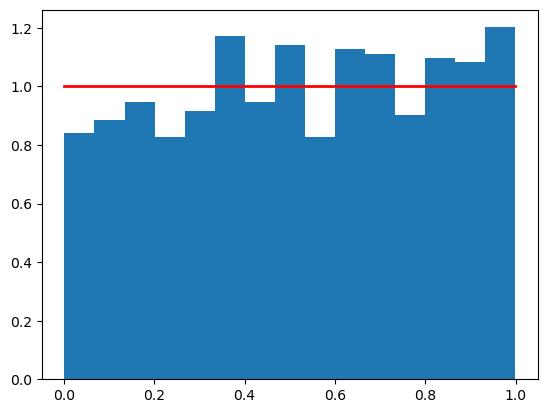

In [198]:
s  = np.random.uniform(0, 1, 1000)
count, bins, ignored = plt.hist(s, 15, density = True)
plt.plot(bins, np.ones_like(bins), linewidth = 2, color = 'red')
plt.show()

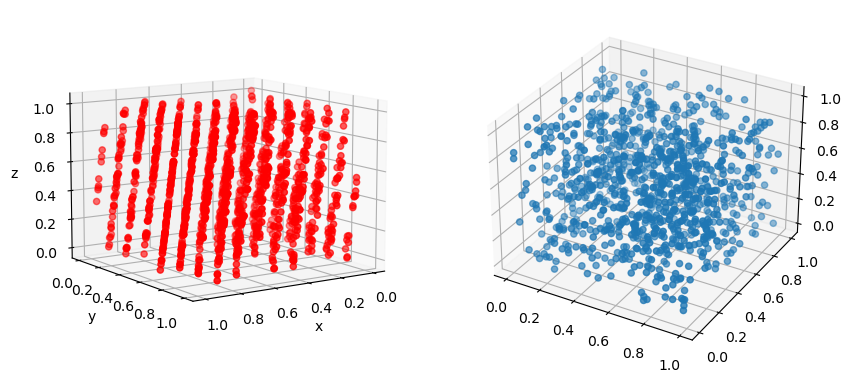

In [199]:
def randssp(p,q):
        
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r

k = randssp(3, 1500)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(k[0, :], k[1, :], k[2, :], color='r')

number_points = 1000
ax2.scatter(np.random.uniform(0, 1, number_points), np.random.uniform(0, 1, number_points), np.random.uniform(0, 1, number_points))

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.view_init(elev = 10, azim = 56)

plt.show()

Fitted mean free path is 0.45 \pm 0.015 and mean free path coefficient put into random number generator is 0.45


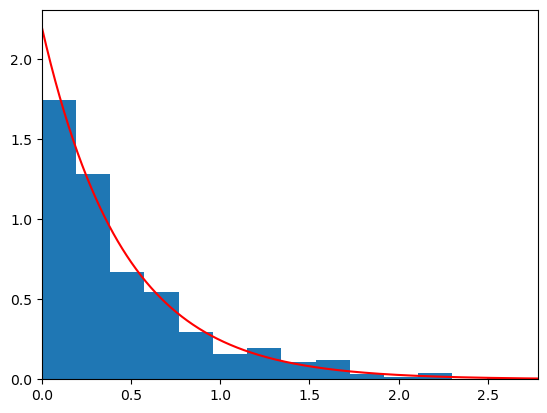

In [200]:
EXPECTED_MEAN_FREE_PATH = 0.45

def random_exponential(mean_free_path, count):
    return -mean_free_path*np.log(np.random.uniform(0, 1, count))

def exponential_function(data, coefficient):
    return 1/coefficient*np.e**(-data/coefficient)

def find_parameters(x, y, yerr):
    """
    Finds the best values for m_z, gamma_z and gamma_ee to have the
    lowest chi-square. Halts code if no optimised parameters could be
    found in the runtime allowed.

    Paramaters
    ----------
    data: 2D array of floats

    Returns
    -------
    3 floats
    """
    if yerr == 'a':
        try:
            expected, uncertainty = curve_fit(exponential_function, x, y) #, sigma=data[:, 2]
        except RuntimeError:
            print('Scipy.optimize.curve_fit was not able to find the best'
                ' parameters')

        return expected[0], math.sqrt(uncertainty[0, 0])
    else:
        try:
            expected, uncertainty = curve_fit(exponential_function, x, y, sigma = yerr)
        except RuntimeError:
            print('Scipy.optimize.curve_fit was not able to find the best'
                ' parameters')

        return expected[0], math.sqrt(uncertainty[0, 0])


count, bins, ignored = plt.hist(random_exponential(EXPECTED_MEAN_FREE_PATH, number_points), 15, density = True)
bin_midpoints = 0.5*(bins[1:] + bins[:-1])
free_path, uncertainty = find_parameters(bin_midpoints, count, 'a')
plt.plot(np.linspace(0, np.max(bin_midpoints), 1000), exponential_function(np.linspace(0, np.max(bin_midpoints), 1000), free_path), color = 'red')
print('Fitted mean free path is {0:.2f} \pm {1:.3f} and mean free path coefficient put into random number generator is {2}'.format(free_path, uncertainty, EXPECTED_MEAN_FREE_PATH))

plt.xlim(0, np.max(bin_midpoints))
plt.show()

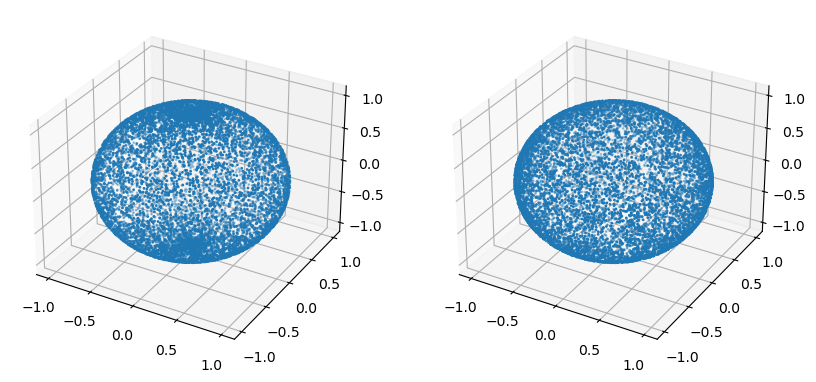

In [201]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

number_points = 10000

def poles_gather():
    theta = np.random.uniform(0, np.pi, number_points)
    phi = np.random.uniform(0, 2*np.pi, number_points)
    xdata = np.sin(theta)*np.cos(phi)
    ydata = np.sin(theta)*np.sin(phi)
    zdata = np.cos(theta)

    return xdata, ydata, zdata

def random_unit_sphere():
    theta = np.arccos(1 - 2*np.random.uniform(0, 1, number_points))
    phi = np.random.uniform(0, 2*np.pi, number_points)
    xdata = np.sin(theta)*np.cos(phi)
    ydata = np.sin(theta)*np.sin(phi)
    zdata = np.cos(theta)

    return xdata, ydata, zdata

ax1.scatter(*poles_gather(), s=1)
ax2.scatter(*random_unit_sphere(), s=1)
plt.show()

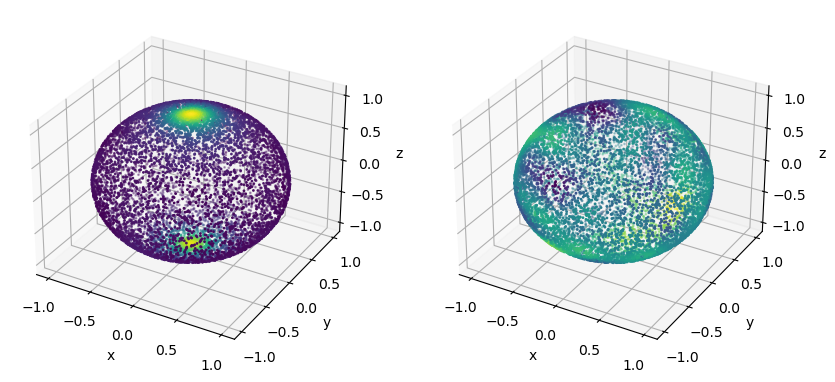

In [202]:
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

def normal_heat_map(axis, x_set, y_set, z_set):
    '''
    Function to generate a heat map from a given 3D datset.
    Uses a gaussian fit to determine the density of the
    values.
    
    Parameters
    ----------
    dataset : 2D array of floats
        Entire dataset for a randomly gnerated 3d region
        that follows a normal distribution.
    
    Returns
    -------
    None.
    
    '''
    density = gaussian_kde([x_set, y_set, z_set])([x_set, y_set, z_set])

    idx = density.argsort()
    x_set = x_set[idx]
    y_set = y_set[idx]
    z_set = z_set[idx]
    density = density[idx]

    axis.scatter(x_set, y_set, z_set, c=density, s=1)
    axis.set_xlabel('x')
    axis.set_ylabel('y')
    axis.set_zlabel('z')

normal_heat_map(ax1, *poles_gather())
normal_heat_map(ax2, *random_unit_sphere())

Fitted mean free path is 0.447 \pm 0.002 and mean free path coefficient put into random number generator is 0.45


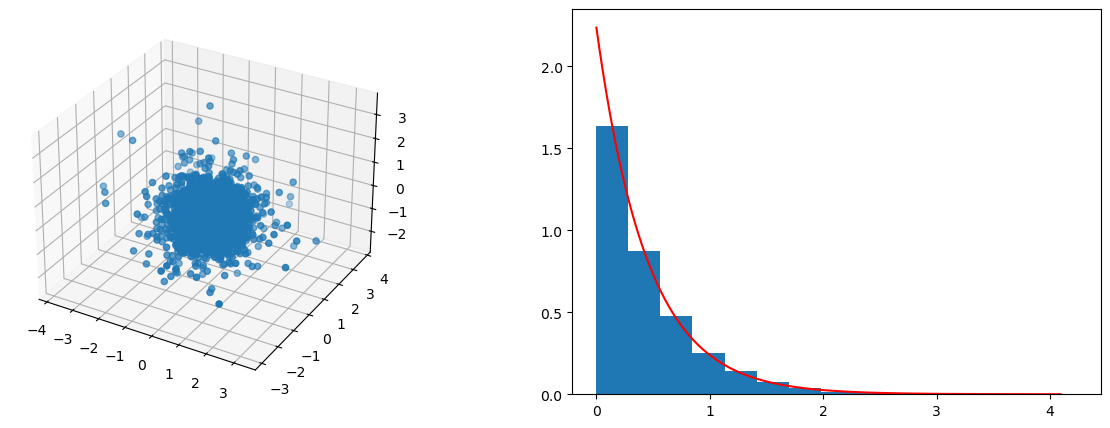

In [203]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

def isotropic_exponential_distribution(mean_free_path, quantity):
    theta = np.arccos(1 - 2*np.random.uniform(0, 1, quantity))
    phi = np.random.uniform(0, 2*np.pi, quantity)
    random_exponential_magnitude = random_exponential(mean_free_path, quantity)
    xdata = np.sin(theta)*np.cos(phi) * random_exponential_magnitude
    ydata = np.sin(theta)*np.sin(phi) * random_exponential_magnitude
    zdata = np.cos(theta) * random_exponential_magnitude

    return xdata, ydata, zdata

data = isotropic_exponential_distribution(EXPECTED_MEAN_FREE_PATH, number_points)
ax1.scatter(*data)

distance_data = np.sqrt(data[0]**2+data[1]**2+data[2]**2)
count, bins, ignored = ax2.hist(distance_data, 15, density = True)
bin_midpoints = 0.5*(bins[1:]+bins[:-1])
free_path, uncertainty = find_parameters(bin_midpoints, count, 'a')
ax2.plot(np.linspace(0, np.max(bin_midpoints), 1000), exponential_function(np.linspace(0, np.max(bin_midpoints), 1000), free_path), color = 'red')
print('Fitted mean free path is {0:.3f} \pm {1:.3f} and mean free path coefficient put into random number generator is {2}'.format(free_path, uncertainty, EXPECTED_MEAN_FREE_PATH))

plt.show()
    

# Complete Simulation of Absorption

For each material, we need to determine the macroscopic absorption and scattering cross sections, and the resultant total mean free path $\lambda$. The macroscopic cross-section of an event, $\Sigma$, is:

\begin{equation}
\Sigma = n\sigma
\end{equation}

where $n = \frac{\rho N_A}{M}$ and $\sigma$ is the microscopic cross-section of the event. Using the values below for the properties of the materials, we can use equation (1) to find the macroscopic cross-section.

\begin{array}{c|ccc}
    & \text{Water} & \text{Lead} & \text{Graphite}\\ \hline
   \text{Absorption}, \sigma_a (barn) & 0.6652 & 0.158 & 0.0045\\
   \text{Scattering}, \sigma_s (barn) & 103.0 & 11.221 & 4.74\\
   \text{Density}, \rho (g/cm^3) & 1.00 & 11.35 & 1.67
\end{array}

where the unit convesions to base units is $1\text{barn} = 10^{-28}m^2$ and $1g/cm^3 = 10^{3}kg/m^3$. Let's store these values into dictionaries so that we can access them easily.

In [204]:
WATER_DICT = {'absorption_sigma': 0.6652e-28, 'scatter_sigma': 103.0e-28, 'density': 1.00e3, 'molar_mass': 18.01528e-3}
LEAD_DICT = {'absorption_sigma': 0.158e-28, 'scatter_sigma': 11.221e-28, 'density': 11.35e3, 'molar_mass': 207.2e-3}
GRAPHITE_DICT = {'absorption_sigma': 0.0045e-28, 'scatter_sigma': 4.74e-28, 'density': 1.67e3, 'molar_mass': 12.011e-3}
MATERIALS_DICT = {'water': WATER_DICT, 'lead': LEAD_DICT, 'graphite': GRAPHITE_DICT}

The total macroscopic cross-section is $\Sigma_T = \Sigma_a + \Sigma_s$ where $\Sigma_a$ is the macroscopic cross-section for absorption events and $\Sigma_s$ is the macroscopic cross-section for scattering events. To find the total mean free path, $\lambda_T$ we use:

The mean free path, average distance a particle will travel before encountering one of the events, is:

\begin{equation}
\lambda = \frac{1}{\Sigma_T} = \frac{1}{\Sigma_a+\Sigma_s}
\end{equation}

In [205]:
def macroscopic_cross_section(density, molar_mass, cross_section):
    n = (density * const.N_A)/molar_mass
    Sigma = n*cross_section
    return Sigma

def attenuation_calculation(Sigma_absorption, Sigma_scattering):
    mean_free_path = 1/(Sigma_absorption + Sigma_scattering)
    return mean_free_path

Thus the absorption and scattering cross sections, and the resultant total mean free path are found to be (which are then added to the material's dictionary):

In [206]:
for name, material in MATERIALS_DICT.items():
    material['macroscopic_absorption_area'] = macroscopic_cross_section(material['density'], material['molar_mass'], material['absorption_sigma'])
    material['macroscopic_scatter_area'] = macroscopic_cross_section(material['density'], material['molar_mass'], material['scatter_sigma'])
    material['mean_free_path'] = attenuation_calculation(material['macroscopic_absorption_area'], material['macroscopic_scatter_area'])
    print('The macroscopic cross-section of absorption and scattering for {0} is: {1:.3f}, {2:.3f}. The total mean free path is {3:.3f}\
    '.format(name, material['macroscopic_absorption_area'], material['macroscopic_scatter_area'], material['mean_free_path']))

The macroscopic cross-section of absorption and scattering for water is: 2.224, 344.308. The total mean free path is 0.003    
The macroscopic cross-section of absorption and scattering for lead is: 0.521, 37.016. The total mean free path is 0.027    
The macroscopic cross-section of absorption and scattering for graphite is: 0.038, 39.689. The total mean free path is 0.025    


For each neutron travelling through the material, we will need to simulate it travelling a distance based off of the exponential probaility distrubution function defined above. After each step, we then generate a random number between 0 and 1. If the random number is less than probaility of absorption, $p_a = \frac{\Sigma_a}{\Sigma_T}$, then the neutron is aborbed, otherwise it is scattered.

Each neutron starts from one surface of the slab (take as x = 0), and then performs a random walk where each step is drawn from the distribution $e^{-\frac{x}{\lambda_T}}$, as above. After each step, you will need to check whether the neutron is absorbed in the slab, has escaped from the slab (x < 0 or x > T), or continues onto a following step. (Hint: Use a while loop, generating the entire set of steps and their locations; a flag variable is_absorbed can be set to 1 to tell the while loop to terminate, whilst another variable i can be used to keep track of how many steps have been taken. The while loop should be continued if all of these conditions are true: x > 0 or x<T then is_absorbed == 0.

In [207]:
NUMBER_NEUTRONS = 100
ITERATIONS= 10
dead_particles = []

class neutron():
    def __init__(self, sigma_a: float, sigma_s: float, mean_free_path: float, thickness: float):
        self.is_absorbed = False
        self.is_backscattered = False
        self.is_transmitted = False
        self.sigma_a = sigma_a
        self.sigma_s = sigma_s
        self.mean_free_path = mean_free_path
        self.thickness = thickness
        self.x_position = random_exponential(mean_free_path, 1)
        self.x_history = np.array([self.x_position])
        
    def timestep(self):
        if np.random.uniform(0, 1, 1) < (self.sigma_a/(self.sigma_a+self.sigma_s)):
            self.is_absorbed = True
        else:
            self.x_position += isotropic_exponential_distribution(self.mean_free_path, 1)[0]
            self.x_history = np.append(self.x_history, self.x_position)
            if self.x_position < 0:
                self.is_backscattered = True
            elif self.x_position > self.thickness:
                self.is_transmitted = True

def neutron_simulation_class(material:dict, thickness:float):
    particle_behaviour_class = np.zeros((0, 3))
    absorption_cross_section = material['macroscopic_absorption_area']
    scattering_cross_section = material['macroscopic_scatter_area']
    free_path = 1/(absorption_cross_section + scattering_cross_section)

    for _ in range(ITERATIONS):
        neutrons = [neutron(absorption_cross_section, scattering_cross_section, free_path, thickness) for _ in range(NUMBER_NEUTRONS)]
        number_absorbed = 0
        number_backscattered = 0
        number_transmitted = 0
        while len(neutrons) > 0:
            for index, particle in enumerate(neutrons):
                particle.timestep()
                if particle.is_absorbed == True:
                    number_absorbed += 1
                    dead_particles.append(neutrons.pop(index))
                elif particle.is_backscattered == True:
                    number_backscattered += 1
                    dead_particles.append(neutrons.pop(index))
                elif particle.is_transmitted == True:
                    number_transmitted += 1
                    dead_particles.append(neutrons.pop(index))
        particle_behaviour_class = np.vstack((particle_behaviour_class, np.array([number_absorbed, number_backscattered, number_transmitted])))
    return(particle_behaviour_class)

In [208]:
def average_behaviour(particle_behaviour):
    average_absorbed, average_absorbed_uncertainty = np.mean(particle_behaviour[:, 0]), np.std(particle_behaviour[:, 0])
    average_backscattered, average_backscattered_uncertainty = np.mean(particle_behaviour[:, 1]), np.std(particle_behaviour[:, 1])
    average_transmitted, average_transmitted_uncertainty = np.mean(particle_behaviour[:, 2]), np.std(particle_behaviour[:, 2])
    return np.array([[average_absorbed, average_absorbed_uncertainty], [average_backscattered, average_backscattered_uncertainty], [average_transmitted, average_transmitted_uncertainty]])

def print_average_behaviour(material_name:str, averages, thickness) -> None:
    print('For {0} with a thickness of {1}m for {2} neutrons in {3} simulations, the behaviour of the neutrons is:'.format(material_name, thickness, NUMBER_NEUTRONS, ITERATIONS))
    print('Average number of absorbed neutrons: {0:.2f} \pm {1:.2f}'.format(averages[0, 0], averages[0, 1]))
    print('Average number of backscattered neutrons: {0:.2f} \pm {1:.2f}'.format(averages[1, 0], averages[1, 1]))
    print('Average number of trasmitted neutrons: {0:.2f} \pm {1:.2f}'.format(averages[2, 0], averages[2, 1]))
    return None

def behaviour_barplot(particle_behaviour):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)

    colours = ['red', 'green', 'blue']
    label_names = ['Absorbed', 'Backscattered', 'Transmitted']
    label_locations = np.linspace(0, 2.5, 3)  # the label locations
    width = (1/ITERATIONS) # the width of the bars
    for i in range(0, 3):
        for j in range(ITERATIONS):
            ax.bar(label_locations[i] - width/2 - (ITERATIONS/2 - 1)*width + j*width, particle_behaviour[j, i] / NUMBER_NEUTRONS, width, color = colours[i])

    fig.tight_layout()
    plt.xticks(label_locations, label_names, fontsize='17')
    plt.ylim(0, 1)
    plt.show()

def overall_behaviour(material_name:str, simulation_function, material_thickness):
    behaviour = simulation_function(MATERIALS_DICT[material_name], material_thickness)
    print_average_behaviour(material_name, average_behaviour(behaviour), material_thickness)
    behaviour_barplot(behaviour)

For water with a thickness of 0.1m for 100 neutrons in 10 simulations, the behaviour of the neutrons is:
Average number of absorbed neutrons: 20.30 \pm 4.29
Average number of backscattered neutrons: 79.50 \pm 4.15
Average number of trasmitted neutrons: 0.20 \pm 0.40


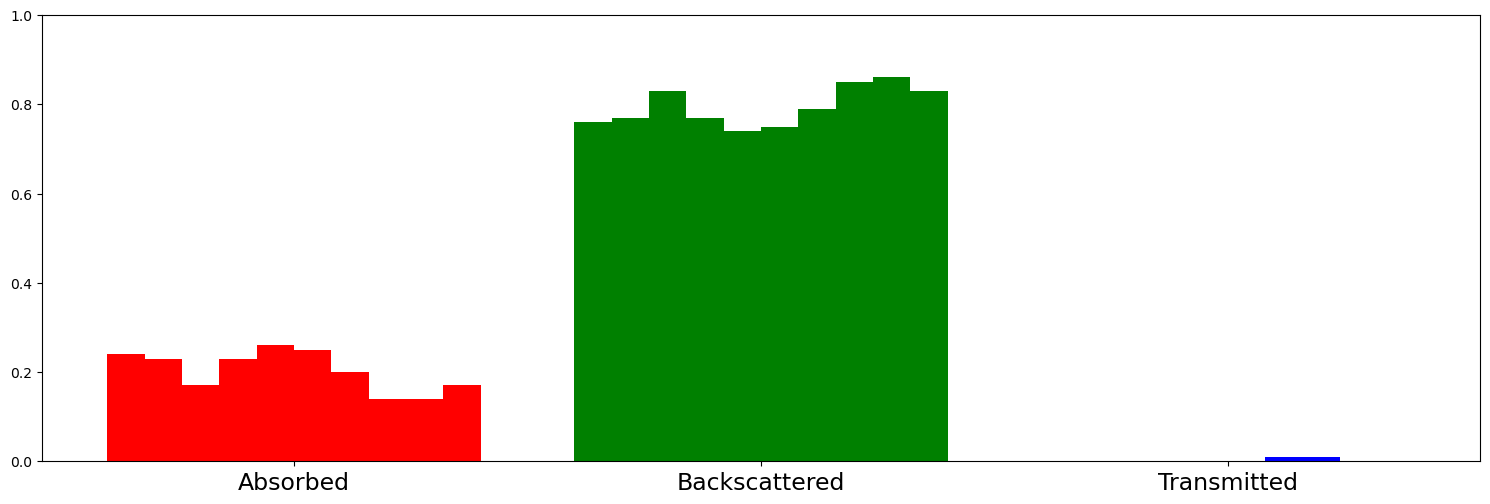

In [209]:
SLAB_THICKNESS = 0.1
overall_behaviour('water', neutron_simulation_class, SLAB_THICKNESS)

Since the history of the x position of each neutron is stored in the class, we can plot the x position of each neutron as a function of time (each timestep) and see how the system evolves:

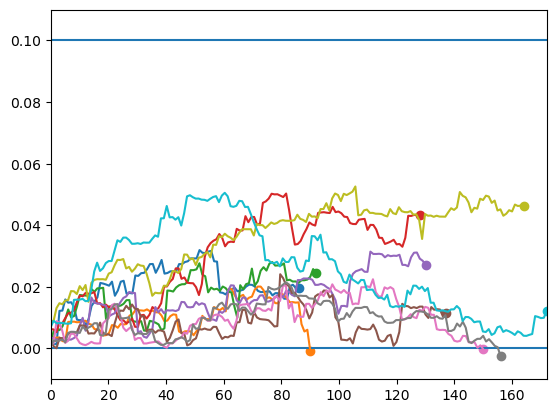

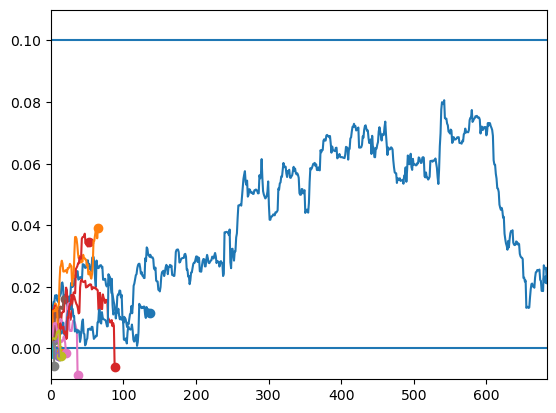

In [210]:
def particle_path_plot(particles):
    maximum = 0
    for particle in particles:
        if len(particle.x_history) > maximum:
            maximum = len(particle.x_history)
        plt.plot(np.linspace(0, len(particle.x_history), len(particle.x_history)), particle.x_history)
        plt.scatter(len(particle.x_history), particle.x_history[-1])

    plt.hlines(0, 0, maximum)
    plt.hlines(SLAB_THICKNESS, 0, maximum)
    plt.ylim(-SLAB_THICKNESS / 10, SLAB_THICKNESS + SLAB_THICKNESS / 10)
    plt.xlim(0, maximum)
    plt.show()

particle_path_plot(dead_particles[-10:])
particle_path_plot(np.take(dead_particles, np.random.randint(0, len(dead_particles), 20)))

Making the simulation faster.

In [211]:
def neutron_simulation_eff(sample_size:int, material:dict, thickness:float) -> tuple((int, int, int)):
    """
    A more efficient version of the previous code using vectorization of functions
    and using numpy instead of other function calls.
    """
    sigma_a = material['macroscopic_absorption_area']
    sigma_s = material['macroscopic_scatter_area']
    mean_free_path = attenuation_calculation(sigma_a, sigma_s)
    probability_absorption = sigma_a / (sigma_a + sigma_s) 
    absorbed = transmitted = backscattered = 0
    
    neutron_array = np.zeros((sample_size, 3))
    neutron_array[:, 0] = random_exponential(mean_free_path, sample_size)

    
    while absorbed + transmitted + backscattered < sample_size:
        neutrons_left = sample_size - transmitted - backscattered - absorbed

        transmitted += len(np.argwhere(neutron_array[:, 0] >= thickness))
        neutron_array = np.delete(neutron_array, np.argwhere(neutron_array[:, 0] >= thickness), axis = 0)
        neutrons_left = sample_size - transmitted - backscattered - absorbed

        random_reference = np.random.uniform(0, 1, neutrons_left)

        absorbed += len(np.argwhere(random_reference < probability_absorption))
        neutron_array = np.delete(neutron_array, np.argwhere(random_reference < probability_absorption), axis = 0)
        neutrons_left = sample_size - transmitted - backscattered - absorbed
        
        backscattered += len(np.argwhere(neutron_array[:, 0] < 0))
        neutron_array = np.delete(neutron_array, np.argwhere(neutron_array[:, 0] < 0), axis = 0)
        neutrons_left = sample_size - transmitted - backscattered - absorbed

        temp_x, temp_y, temp_z = isotropic_exponential_distribution(mean_free_path, neutrons_left)
        neutron_array[:, 0] += temp_x
        neutron_array[:, 1] += temp_y
        neutron_array[:, 2] += temp_z

    return (absorbed, backscattered, transmitted)

def iterative_neutron_simulation_eff(material: dict, thickness:float):
    particle_behaviour_eff = np.zeros((0, 3))
    for _ in range(ITERATIONS):
        particle_behaviour_eff = np.vstack((particle_behaviour_eff, neutron_simulation_eff(NUMBER_NEUTRONS, material, thickness))) #0 for water
    return particle_behaviour_eff

For water with a thickness of 0.1m for 15000 neutrons in 10 simulations, the behaviour of the neutrons is:
Average number of absorbed neutrons: 3095.50 \pm 61.53
Average number of backscattered neutrons: 11857.60 \pm 61.56
Average number of trasmitted neutrons: 46.90 \pm 5.89


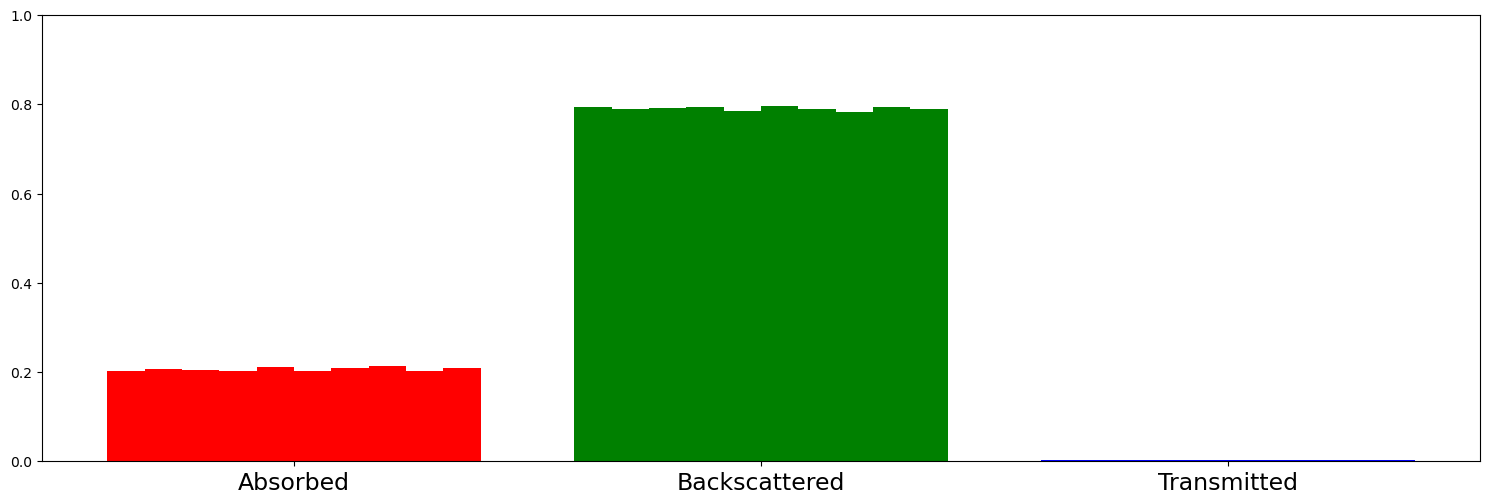

For lead with a thickness of 0.1m for 15000 neutrons in 10 simulations, the behaviour of the neutrons is:
Average number of absorbed neutrons: 1629.10 \pm 36.36
Average number of backscattered neutrons: 9140.30 \pm 55.11
Average number of trasmitted neutrons: 4230.60 \pm 50.84


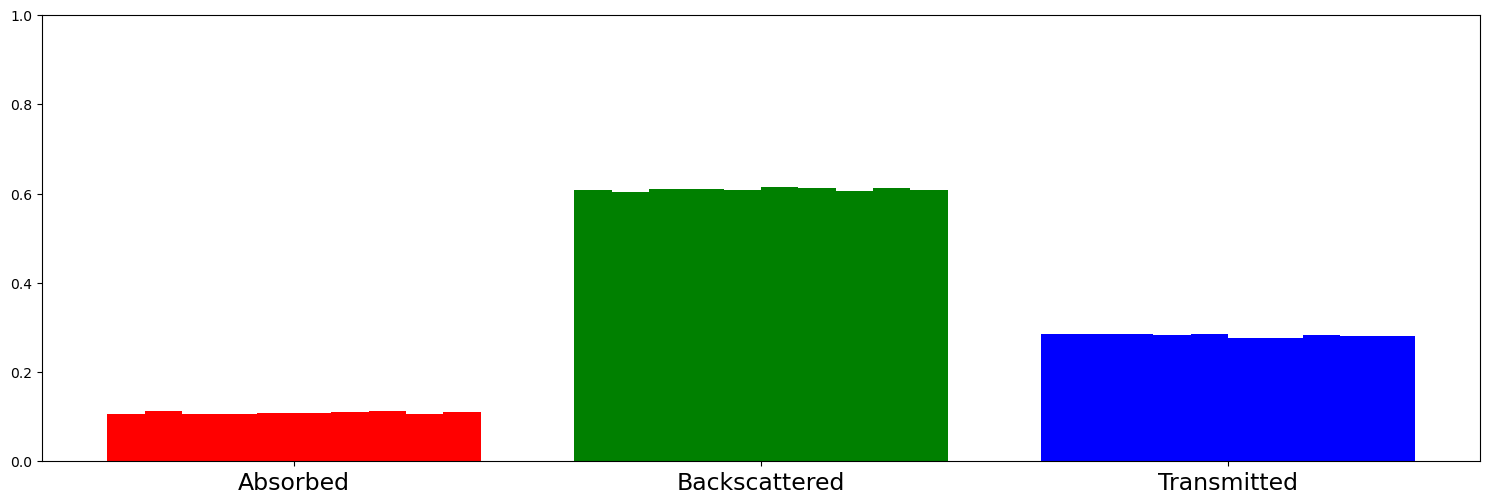

For graphite with a thickness of 0.1m for 15000 neutrons in 10 simulations, the behaviour of the neutrons is:
Average number of absorbed neutrons: 131.00 \pm 12.39
Average number of backscattered neutrons: 10274.50 \pm 54.60
Average number of trasmitted neutrons: 4594.50 \pm 53.99


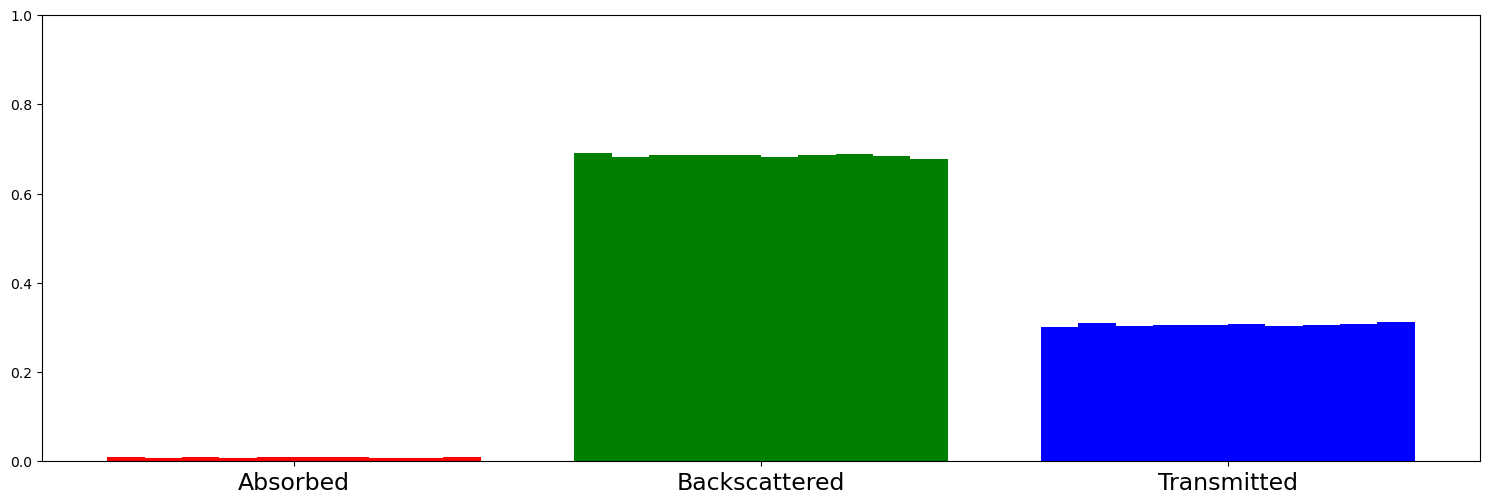

In [212]:
NUMBER_NEUTRONS = 15000
overall_behaviour('water', iterative_neutron_simulation_eff, SLAB_THICKNESS)
overall_behaviour('lead', iterative_neutron_simulation_eff, SLAB_THICKNESS)
overall_behaviour('graphite', iterative_neutron_simulation_eff, SLAB_THICKNESS)

Calculate the variation in neutron transmission, reflection and absorption with slab
thickness for the three materials. Determine the characteristic attenuation lengths for the
three materials from the transmitted intensity, with estimated errors. Include a summary
of numerical data and representative graphs.
Hint: when fitting the transmitted neutron data you may have some thickness values
giving zero transmitted neutrons, which will stop np.polyfit from working (log(0) = -
Inf). You need to remove data points containing –Inf before fitting. 

0.019 \pm 0.000
0.090 \pm 0.003
0.106 \pm 0.005


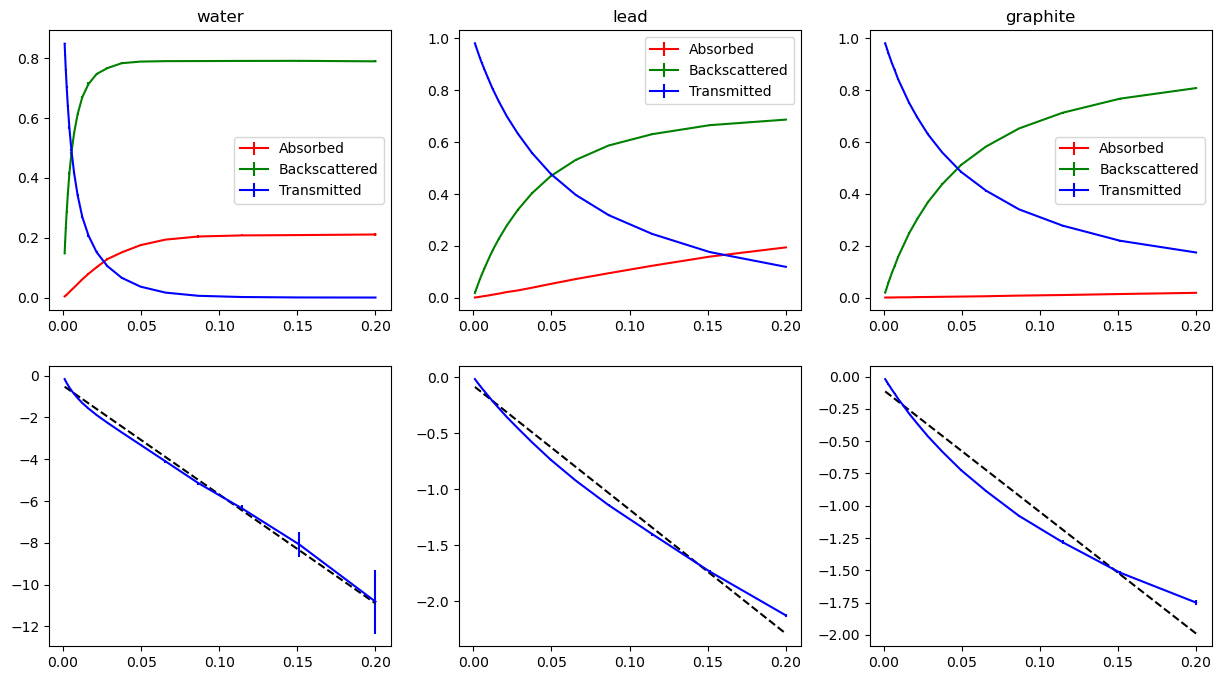

In [213]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
axes = np.array([[ax1, ax2, ax3], [ax4, ax5, ax6]])

def linear_function(data, gradient, intercept):
    return gradient*data + intercept

def find_linear_parameters(x, y, yerr):
    try:
        expected, uncertainty = np.polyfit(x, y, 1, full = False, cov=True)
    except RuntimeError:
        print('Scipy.optimize.curve_fit was not able to find the best'
              ' parameters')

    return expected, uncertainty

def varying_thickness(starting_thickness, ending_thickness, number_points):
    index = 0
    for material_name, material_dict in MATERIALS_DICT.items():
        axes[0][index].set_title(material_name)
        absorbed_behaviour = np.zeros((0, 2))
        backscattered_behaviour = np.zeros((0, 2))
        transmitted_behaviour = np.zeros((0, 2))
        thickness_array = np.geomspace(starting_thickness, ending_thickness, number_points)
        for material_thickness in thickness_array:
            average_array = average_behaviour(iterative_neutron_simulation_eff(material_dict, material_thickness)) / NUMBER_NEUTRONS
            absorbed_behaviour = np.vstack((absorbed_behaviour, average_array[0, :]))
            backscattered_behaviour = np.vstack((backscattered_behaviour, average_array[1, :]))
            transmitted_behaviour = np.vstack((transmitted_behaviour, average_array[2, :]))
        axes[0][index].errorbar(thickness_array, absorbed_behaviour[:, 0], yerr = absorbed_behaviour[:, 1], color = 'red', label = 'Absorbed')
        axes[0][index].errorbar(thickness_array, backscattered_behaviour[:, 0], yerr = backscattered_behaviour[:, 1], color = 'green', label = 'Backscattered')
        axes[0][index].errorbar(thickness_array, transmitted_behaviour[:, 0], yerr = transmitted_behaviour[:, 1], color = 'blue', label = 'Transmitted')
        axes[0][index].legend()

        xdata = np.linspace(starting_thickness, ending_thickness, 10000)
        parameters_linear, uncertainty_linear = find_linear_parameters(thickness_array, np.log(transmitted_behaviour[:, 0]), (1 / transmitted_behaviour[:, 0]) * transmitted_behaviour[:, 1])
        mean_free_path_linear, mean_free_path_uncertainty_linear = parameters_linear[0], np.sqrt(uncertainty_linear[0, 0])
        intercept, intercept_uncertainty = parameters_linear[1], np.sqrt(uncertainty_linear[1, 1])
        print('{0:.3f} \pm {1:.3f}'.format(-1 / mean_free_path_linear, (1 / (mean_free_path_linear**2))*mean_free_path_uncertainty_linear))
        axes[1][index].errorbar(thickness_array, np.log(transmitted_behaviour[:, 0]), yerr = (1 / transmitted_behaviour[:, 0]) * transmitted_behaviour[:, 1], color = 'blue', label = 'Transmitted')
        axes[1][index].plot(xdata, linear_function(xdata, mean_free_path_linear, intercept), 'k--')

        index += 1

varying_thickness(0.001, 0.2, 20)

## Woodcock method

For water with a thickness of 0.1m for 15000 neutrons in 10 simulations, the behaviour of the neutrons is:
Average number of absorbed neutrons: 3012.00 \pm 35.03
Average number of backscattered neutrons: 11936.80 \pm 34.59
Average number of trasmitted neutrons: 51.20 \pm 3.60


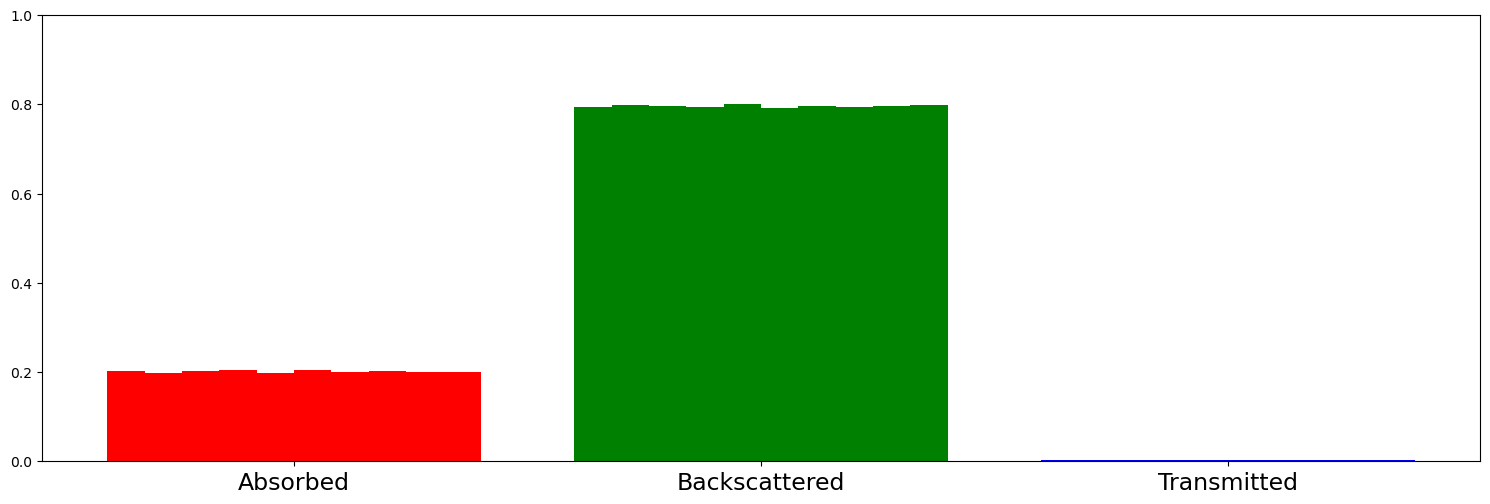

In [232]:
def real_step(particles, free_path, macroscopic_cross_sections, absorbed, backscattered, transmitted, max_thickness):
    #transmitted criteria
    transmitted += len(np.argwhere(particles[:, 0] > max_thickness))
    particles = np.delete(particles, np.argwhere(particles[:, 0] > max_thickness), axis = 0)
    #backscattered criteria
    backscattered += len(np.argwhere(particles[:, 0] < 0))
    particles = np.delete(particles, np.argwhere(particles[:, 0] < 0), axis = 0)
    #absorption criteria
    u = np.random.uniform(0, 1, len(particles))
    probability_absorption = macroscopic_cross_sections[0] / np.sum(macroscopic_cross_sections)
    absorbed += len(np.argwhere(u < probability_absorption))
    particles = np.delete(particles, np.argwhere(u < probability_absorption), axis = 0)
    previous_particles = particles.copy()
    #if none of the above, the particles is scattered
    particles += np.array(isotropic_exponential_distribution(free_path, len(particles))).T
    return particles, previous_particles, absorbed, backscattered, transmitted

def fictitious_step(current_position, previous_position, free_path):
    difference_vector = np.add(current_position, previous_position*-1)
    magnitude = np.sqrt(np.sum(difference_vector**2, axis = 1))
    normalised_direction = difference_vector / magnitude[:, None]
    step = normalised_direction * random_exponential(free_path, len(normalised_direction))[:, None]
    previous_position = current_position.copy()
    current_position += step
    return current_position, previous_position

def Woodcock(sample_size: int, material_one: dict, material_two: dict, thickness_1: float, thickness_2: float):
    '''
    First we are assuming that Sigma_1 < Sigma_2 --> lambda_1 > lambda_2
    '''
    macroscopic_cross_sections1 = [material_one['macroscopic_absorption_area'], material_one['macroscopic_scatter_area']]
    macroscopic_cross_sections2 = [material_two['macroscopic_absorption_area'], material_two['macroscopic_scatter_area']]
    Sigma_1 = np.sum(macroscopic_cross_sections1)
    Sigma_2 = np.sum(macroscopic_cross_sections2)
    Sigma_T = np.max([Sigma_1, Sigma_2])

    neutron_array = np.zeros((sample_size, 3))
    neutron_array_previous_step = np.zeros((sample_size, 3))
    neutron_array[:, 0] = random_exponential(1 / Sigma_1, sample_size)
    neutrons_left = sample_size

    number_absorbed = 0
    number_backscattered = 0
    number_transmitted = 0

    probability_real_step = Sigma_1 / Sigma_T

    while len(neutron_array) > 0:
        v = np.random.uniform(0, 1, neutrons_left)
        fictitious, prev_fictitious = fictitious_step(neutron_array[(v >= probability_real_step) & (neutron_array[:, 0] < thickness_1)], neutron_array_previous_step[(v >= probability_real_step) & (neutron_array[:, 0] < thickness_1)], 1 / Sigma_T)
        real_material_1, prev_1, number_absorbed, number_backscattered, number_transmitted = real_step(neutron_array[(v < probability_real_step) & (neutron_array[:, 0] < thickness_1)], 1 / Sigma_1, macroscopic_cross_sections1, number_absorbed, number_backscattered, number_transmitted, thickness_2)
        real_material_2, prev_2, number_absorbed, number_backscattered, number_transmitted = real_step(neutron_array[neutron_array[:, 0] >= thickness_1], 1 / Sigma_2, macroscopic_cross_sections2, number_absorbed, number_backscattered, number_transmitted, thickness_2)
        neutron_array = np.vstack((fictitious, real_material_1, real_material_2))
        neutron_array_previous_step = np.vstack((prev_fictitious, prev_1, prev_2))
        neutrons_left = len(neutron_array)
    return(number_absorbed, number_backscattered, number_transmitted)

particle_behaviour = np.zeros((0, 3))
for _ in range(ITERATIONS):
    particle_behaviour = np.vstack((particle_behaviour, Woodcock(15000, MATERIALS_DICT['water'], MATERIALS_DICT['water'], 0.05, 0.1)))
print_average_behaviour('water', average_behaviour(particle_behaviour), 0.1)
behaviour_barplot(particle_behaviour)
